TODO:

- [ ] Update Planning TODO list
- [ ] Create script version

# Executive Summary

This notebook will attempt to answer the following research question:

    What's money got to do with it?

## PLANNING

- [X] Planning
    - [X] import libraries/packages
    - [X] configure notebook environment
    - [X] define helper functions
- [X] Acquire data
    - [X] get PEIMS financial data
    - [X] get STAAR performance data
    - [X] get ETHNICITY data
- [X] Use Dtale to analyze the dataset
         
*First, let's prepare the notebook environment*

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for statistical testing
from scipy import stats

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import shap

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# print the JS visualization code to the notebook
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# get the master dataset
df = pd.read_csv('../data/inter/clean_master_2019.csv')

In [3]:
df = df.drop(columns=['District'])

In [4]:
df.head()

,Payroll,Professional and Contracted,Supplies and Materials,Other Operating,Instruction and Transfer,Instructional Resource Media Service,Curriculum/Staff Development,Instructional Leadership,Campus Administration,Guidance and Counseling,Social Work,Health Services,Transportation,Food Service,Extracurricular,General Adminstration,Plant Maintenance/Operation,Security and Monitoring Service,Data Processing Services,Community Services,Regular Program,Gifted and Talented Program,Career and Technology Program,Students with Disabilities,State Compensatory Education,Bilingual Program,High School Allotment Program,Pre-K,Atheletics Program,Undistributed Program,Total Program Expenditures,Other Uses,Total Number of Students,Percentage of Non-White Students,Passing Rate
0,6025217,1075904,648206,809559,4649118,66490,4986,270353,306385,998314,0,37882,293070,287406,413755,284553,773085,0,173489,0,2778638,3968,251350,3005575,273747,9599,40285,32890,304174,1858660,8558886,48633,932,0.145315,0.903433
1,9093950,1514689,784631,303052,7043892,117860,33175,66374,574699,202086,0,33657,422887,630202,598484,558948,1248908,13530,151120,500,5313722,93,852319,1028587,799037,0,101243,0,339045,3262276,11696322,102465,1991,0.211415,0.829232
2,6659596,927209,937810,278109,4611747,51126,157830,0,466345,199338,0,102385,38800,411195,754465,539512,1014501,45482,409998,0,3945494,10154,552217,726827,377013,0,59567,114404,571388,2445660,8802724,481,1365,0.213158,0.779487
3,3134475,373513,408024,105878,2087166,19990,0,7905,379101,75235,0,40628,148301,257465,210240,201520,465549,10415,118375,0,1499301,14498,164641,447072,402415,2706,48748,29920,0,1412589,4021890,53786,569,0.268657,0.738137
4,25587063,5603896,4134969,1048416,18807861,167823,535649,1033275,2201907,1443630,170074,208736,1442619,2071781,1422648,1287489,3937087,242658,1006175,394932,15527277,39671,1625090,2422707,3147717,231026,302531,923035,1214433,10940857,36374344,0,5497,0.717973,0.595598


In [5]:
df.shape

(1056, 35)

In [6]:
X = df.loc[:, df.columns != 'Passing Rate']
y = df.loc[:, df.columns == 'Passing Rate']

In [7]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=493)

In [8]:
# instantiate
xgbr = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 493)

In [9]:
# fit
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [10]:
# predict
pred = xgbr.predict(X_test)

In [11]:
# score
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.176454


In [12]:
params = { 'max_depth': [3,6],
           'learning_rate': [0.01, 0.1],
           'n_estimators': [100, 500],
           'colsample_bytree': [0.3, 0.7]}
xgbr2 = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr2, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error', verbose=1)

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
Lowest RMSE:  0.15813684763176297


In [24]:
# predict
pred2 = clf.best_estimator_.predict(X_test)

# score
rmse2 = np.sqrt(MSE(y_test, pred2))
print("RMSE : % f" %(rmse2))

RMSE :  0.071357


### SHAP

In [30]:
explainer = shap.TreeExplainer(clf.best_estimator_)
shap_values = explainer.shap_values(X_test)

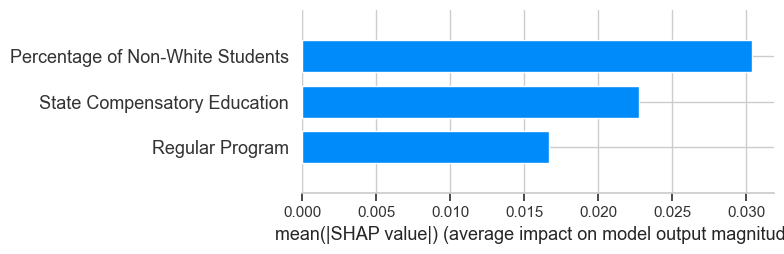

In [36]:
shap.summary_plot(shap_values, X_test, plot_type="bar",  max_display=3)

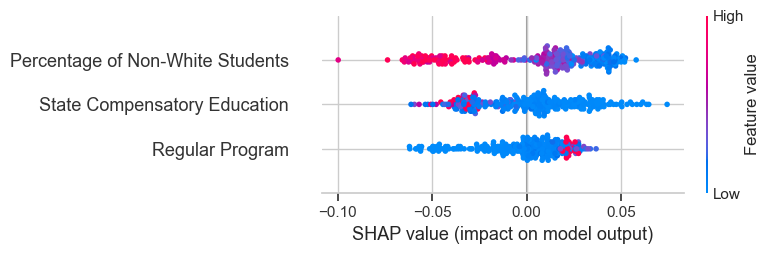

In [37]:
shap.summary_plot(shap_values, X_test, max_display=3)

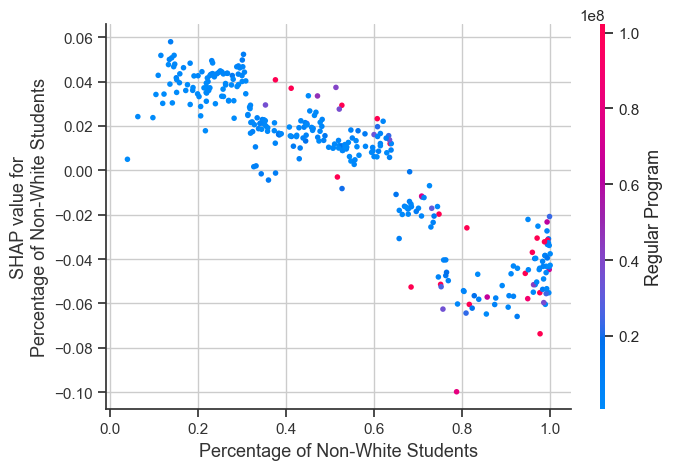

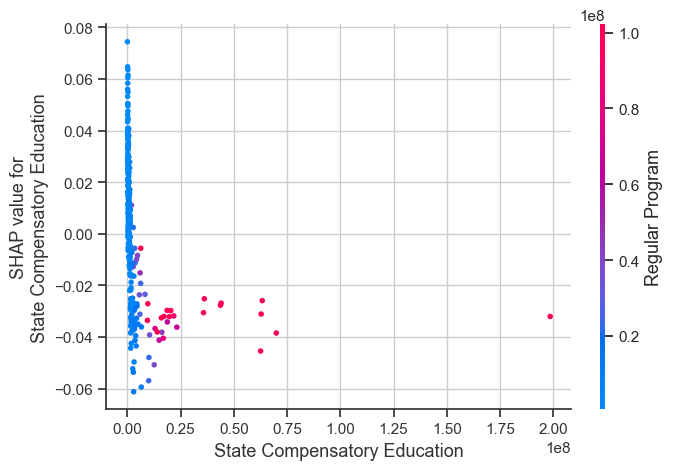

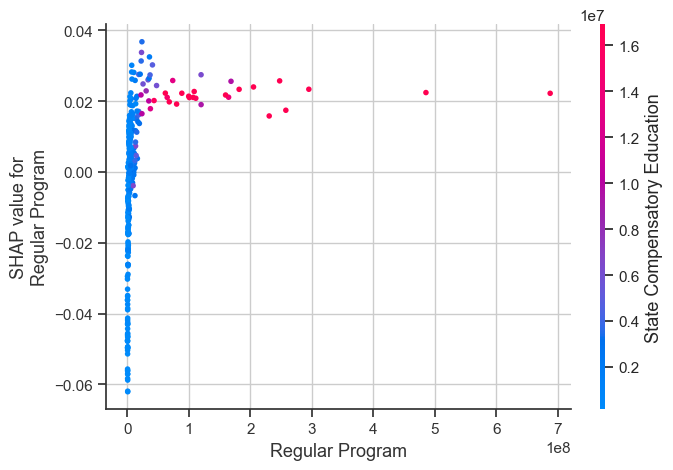

In [38]:
shap.dependence_plot('Percentage of Non-White Students', shap_values, X_test)
shap.dependence_plot('State Compensatory Education', shap_values, X_test)
shap.dependence_plot('Regular Program', shap_values, X_test)